<a href="https://colab.research.google.com/github/metorkhai/DATA-MINING/blob/main/Clustering_News_BT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1️⃣ Đọc file Excel đã thu thập
df = pd.read_excel("/content/sample_data/news_data_20251014_220302.xlsx", engine="openpyxl")
df.head()

,source,title,link,published,summary
0,Dân trí - Sức khỏe,Gừng có thực sự làm dịu cơn đau dạ dày?,https://dantri.com.vn/suc-khoe/gung-co-thuc-su...,"Thu, 09 Oct 2025 09:24:12 +0700","<a href=""https://dantri.com.vn/suc-khoe/gung-c..."
1,VnExpress - Tin mới,"Siết quản lý, khai thác đất hiếm để bảo đảm qu...",https://vnexpress.net/siet-quan-ly-khai-thac-d...,"Tue, 14 Oct 2025 17:24:34 +0700","<a href=""https://vnexpress.net/siet-quan-ly-kh..."
2,VnExpress - Công nghệ,Intel ra chip Panther Lake sản xuất tại Mỹ,https://vnexpress.net/intel-ra-chip-panther-la...,"Fri, 10 Oct 2025 07:56:55 +0700","<a href=""https://vnexpress.net/intel-ra-chip-p..."
3,VnExpress - Công nghệ,Bưu điện trở thành cửa hàng bách hóa,https://vnexpress.net/buu-dien-tro-thanh-cua-h...,"Sat, 11 Oct 2025 09:00:00 +0700","<a href=""https://vnexpress.net/buu-dien-tro-th..."
4,Vietnamnet - Thể thao,Tây Ban Nha: Đội tuyển đến từ hành tinh khác,https://vietnamnet.vn/tay-ban-nha-doi-tuyen-de...,"Tue, 14 Oct 2025 12:01:55 +0700","<a href=""https://vietnamnet.vn/tay-ban-nha-doi..."


In [ ]:
# 2️⃣ Xem kích thước & cột
print("Số dòng:", len(df))
print("Các cột:", df.columns.tolist())
print()

Số dòng: 500
Các cột: ['source', 'title', 'link', 'published', 'summary']



In [ ]:
# 3️⃣ Kiểm tra dữ liệu trống
print("==> Số giá trị thiếu mỗi cột:")
print(df.isnull().sum())
print()

# 4️⃣ Kiểm tra trùng
print("==> Số tin trùng tiêu đề:", df['title'].duplicated().sum())
print("==> Số tin trùng link:", df['link'].duplicated().sum())
print()

# 5️⃣ Xem 5 dòng đầu để quan sát nội dung
print(df.head())

# 6️⃣ Xem tần suất từng nguồn (để xem báo nào chiếm nhiều)
print("\n==> Thống kê theo nguồn:")
print(df['source'].value_counts())


==> Số giá trị thiếu mỗi cột:
source       0
title        0
link         0
published    0
summary      0
dtype: int64

==> Số tin trùng tiêu đề: 13
==> Số tin trùng link: 14

                  source                                              title  \
0     Dân trí - Sức khỏe            Gừng có thực sự làm dịu cơn đau dạ dày?   
1    VnExpress - Tin mới  Siết quản lý, khai thác đất hiếm để bảo đảm qu...   
2  VnExpress - Công nghệ         Intel ra chip Panther Lake sản xuất tại Mỹ   
3  VnExpress - Công nghệ               Bưu điện trở thành cửa hàng bách hóa   
4  Vietnamnet - Thể thao       Tây Ban Nha: Đội tuyển đến từ hành tinh khác   

                                                link  \
0  https://dantri.com.vn/suc-khoe/gung-co-thuc-su...   
1  https://vnexpress.net/siet-quan-ly-khai-thac-d...   
2  https://vnexpress.net/intel-ra-chip-panther-la...   
3  https://vnexpress.net/buu-dien-tro-thanh-cua-h...   
4  https://vietnamnet.vn/tay-ban-nha-doi-tuyen-de...   

             

Ta sẽ làm chuỗi xử lý chuẩn gồm:

Chuyển chữ thường (lowercase)

Loại bỏ dấu tiếng Việt (tùy chọn)

Loại bỏ ký tự đặc biệt, số, dấu câu, HTML...

Tách từ (tokenization)

Loại bỏ stopwords (từ vô nghĩa)

(Tùy chọn) Ghép cụm từ có nghĩa cố định (như “kinh tế”, “trí tuệ nhân tạo”)

In [ ]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.5 MB/s eta 0:00:00


In [ ]:
import re
import html
import unicodedata
from underthesea import word_tokenize, ner

def normalize_unicode(text):
    """Đảm bảo tiếng Việt hiển thị đúng mã (NFC form)."""
    return unicodedata.normalize("NFC", text)

stopwords = [
    "và", "là", "có", "của", "trong", "với", "một", "những", "này", "được",
    "cho", "về", "khi", "đã", "tại", "theo", "ra", "năm", "ngày", "sau", "trước"
]

def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    text = normalize_unicode(text)
    text = text.lower()
    text = html.unescape(text)
    text = re.sub(r"http\S+|www\S+|<.*?>", " ", text)
    text = re.sub(r"[^a-zA-ZÀ-ỹ\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    # 6️⃣ Tách từ tiếng Việt
    text = word_tokenize(text, format="text")

    # 7️⃣ Nhận dạng và giữ tên riêng
    entities = ner(text)
    named_entities = [
        w.replace(" ", "_")
        for (w, pos, ner_label, _) in entities
        if ner_label in ["B-PER", "B-ORG", "B-LOC"]
    ]
    if named_entities:
        text += " " + " ".join(named_entities)

    # 8️⃣ Loại bỏ stopwords
    text = " ".join([w for w in text.split() if w not in stopwords])
    return text


In [ ]:
df["clean_title"] = df["title"].apply(preprocess_text)
print(df[["title", "clean_title"]].head(10))


                                               title  \
0            Gừng có thực sự làm dịu cơn đau dạ dày?   
1  Siết quản lý, khai thác đất hiếm để bảo đảm qu...   
2         Intel ra chip Panther Lake sản xuất tại Mỹ   
3               Bưu điện trở thành cửa hàng bách hóa   
4       Tây Ban Nha: Đội tuyển đến từ hành tinh khác   
5            6 máy lọc không khí có màn lọc ấn tượng   
6  Son Heung Min lập kỷ lục vĩ đại trong ngày tuy...   
7  VPBank đạt 9.200 tỷ đồng lợi nhuận hợp nhất tr...   
8  &amp;apos;Điềm báo lạ&amp;apos; khiến giá vàng...   
9  'Trí tuệ nhân tạo không thể thay thế được kiểm...   

                                         clean_title  
0                gừng thực_sự làm dịu cơn đau dạ_dày  
1  siết quản_lý khai_thác đất_hiếm để bảo_đảm quố...  
2                intel chip panther_lake sản_xuất mỹ  
3               bưu_điện trở_thành cửa_hàng bách_hóa  
4        tây ban_nha đội_tuyển đến từ hành_tinh khác  
5                 máy lọc không_khí màn lọc ấn_tượng 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Chỉ lấy cột clean_title
texts = df["clean_title"]

# Tạo TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=1000,    # Giới hạn 1000 từ phổ biến nhất
    ngram_range=(1, 2),   # Dùng cả từ đơn và từ ghép (unigram + bigram)
    min_df=2              # Chỉ giữ từ xuất hiện ít nhất ở 2 bài
)

X = vectorizer.fit_transform(texts)

print(f"Kích thước ma trận TF-IDF: {X.shape}")
print("Ví dụ vài từ khóa TF-IDF:")
print(vectorizer.get_feature_names_out()[:20])


Kích thước ma trận TF-IDF: (500, 1000)
Ví dụ vài từ khóa TF-IDF:
['ai' 'ai đang' 'air_tính' 'air_tính mở_rộng' 'an_ninh' 'anh' 'anh_em'
 'ao' 'apea' 'apos' 'asian' 'asian cup' 'ba' 'ban_nha' 'bao'
 'bao phương_vinh' 'barca' 'bay' 'bay vận_tải' 'billiards']


In [ ]:
from sklearn.cluster import KMeans

# Giả sử bạn đã có ma trận TF-IDF: X
k = 6  # tạm chia thành 3 cụm để thử
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

# Gán nhãn cụm vào DataFrame
df["cluster"] = kmeans.labels_

# Xem số lượng mỗi cụm
print(df["cluster"].value_counts())


cluster
1    290
5     65
0     41
2     40
3     34
4     30
Name: count, dtype: int64


In [ ]:
import numpy as np

# Lấy tên các từ (feature)
terms = vectorizer.get_feature_names_out()

# Lấy trọng tâm mỗi cụm (centroid)
centers = kmeans.cluster_centers_

# Hiển thị top 3 từ khóa mỗi cụm
for i in range(k):
    top_indices = centers[i].argsort()[-3:][::-1]
    top_terms = [terms[idx] for idx in top_indices]
    print(f"Cụm {i}: {', '.join(top_terms)}")


Cụm 0: cup, indonesia, dự_world
Cụm 1: bị, tphcm, doanh_nghiệp
Cụm 2: triệu, vàng, đồng
Cụm 3: từ, đến, kinh_doanh
Cụm 4: người, tôi, ai
Cụm 5: việt_nam, nepal, tuyển việt_nam


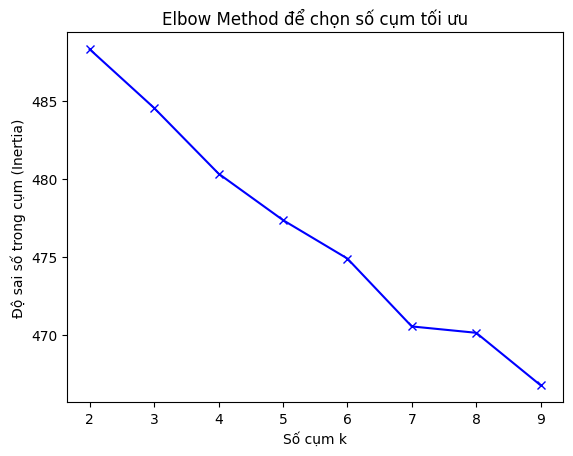

In [ ]:
import matplotlib.pyplot as plt

inertias = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Số cụm k')
plt.ylabel('Độ sai số trong cụm (Inertia)')
plt.title('Elbow Method để chọn số cụm tối ưu')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Bước 1: Tạo TF-IDF vector ---
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3)

# Áp dụng cho cột 'clean_title'
X_tfidf = tfidf.fit_transform(df["clean_title"])

print("Kích thước ma trận TF-IDF:", X_tfidf.shape)


Kích thước ma trận TF-IDF: (500, 479)


In [ ]:
from sklearn.cluster import KMeans

# --- Bước 2: Huấn luyện KMeans ---
k = 6  # hoặc giá trị bạn chọn ở Elbow Method
kmeans_tfidf = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_tfidf.fit(X_tfidf)

# Gán nhãn cụm vào DataFrame
df["cluster_tfidf"] = kmeans_tfidf.labels_

df[["title", "cluster_tfidf"]].head(10)


,title,cluster_tfidf
0,Gừng có thực sự làm dịu cơn đau dạ dày?,4
1,"Siết quản lý, khai thác đất hiếm để bảo đảm qu...",1
2,Intel ra chip Panther Lake sản xuất tại Mỹ,4
3,Bưu điện trở thành cửa hàng bách hóa,4
4,Tây Ban Nha: Đội tuyển đến từ hành tinh khác,0
5,6 máy lọc không khí có màn lọc ấn tượng,4
6,Son Heung Min lập kỷ lục vĩ đại trong ngày tuy...,4
7,VPBank đạt 9.200 tỷ đồng lợi nhuận hợp nhất tr...,4
8,&amp;apos;Điềm báo lạ&amp;apos; khiến giá vàng...,4
9,'Trí tuệ nhân tạo không thể thay thế được kiểm...,4


In [ ]:
import numpy as np

def print_top_terms_per_cluster(vectorizer, kmeans_model, n_terms=10):
    terms = np.array(vectorizer.get_feature_names_out())
    for i, center in enumerate(kmeans_model.cluster_centers_):
        top_terms = terms[center.argsort()[-n_terms:][::-1]]
        print(f"\n🌀 Cụm {i}: {', '.join(top_terms)}")

# In top 10 từ đại diện cho mỗi cụm
print_top_terms_per_cluster(tfidf, kmeans_tfidf, n_terms=10)



🌀 Cụm 0: người, đến, nhất, triệu, từ, việt, vô_địch, do, người thay, robot

🌀 Cụm 1: vì, để, sao, cách, vì sao, bị, mua, học, triệu, từ

🌀 Cụm 2: việt_nam, nepal, tuyển việt_nam, tuyển, trận, cơ_hội, hlv, thắng, mở_rộng, xem

🌀 Cụm 3: doanh_nghiệp, số, việt_nam, công_nghệ, công_nghệ số, ai, số việt_nam, doanh_nghiệp công_nghệ, mb, sẽ

🌀 Cụm 4: bị, triệu, tăng, mới, tphcm, vàng, indonesia, đồng, trung_quốc, từ

🌀 Cụm 5: cup, world cup, world, dự_world, dự_world cup, vòng loại, vòng, loại, đội, mộng


#

# DÙNG Word2Vec

> Thêm khối trích dẫn



In [ ]:
!pip uninstall -y scipy gensim numpy


Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Successfully uninstalled gensim-4.3.2
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install numpy==1.26.4 scipy==1.14.1 gensim==4.3.2


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached gensim-4.3.2-cp312-cp312-linux_x86_64.whl
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 